Question 1. For the frame shown in figure 1, determine the following. E = 210 GPa, A= 2 x
10-2 m2, I = 5 x 10-5 m-4, P = 20 kN, M= 12 kN.m, B= 4 m, and H=3 m.
1. Global stiffness matrix for the structure.
2. Displacements and rotations at nodes 2 and 3.
3. Reactions at nodes 1 and 4.
4. Axial force, shear force, and bending moment in each element.
5. Axial force, shear force, and bending moment diagrams for each element


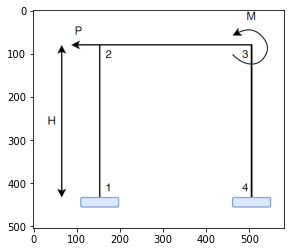

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('Q1.png')
imgplot = plt.imshow(img)

In [2]:

#E = 210e6     #A = 2e-2    #I = 5e-5
#L1=3          #L2=4        #L3=L1
#HF=20         #M=12
E=float(input("Enter Young's Modulus in KN/m^2"))
A=float(input("Enter Area in m^2"))
I=float(input("Enter Moment of inertia in m^4"))
L1=float(input("Enter Height of frame in m"))
L2=float(input("Enter Length of frame in m"))
L3=L1
HF=float(input("Enter magnitude Load at node 2 in KN"))
M=float(input("Enter magnitude Moment at node 3 in KN-m"))

In [3]:
def PlaneFrameElementStiffness(E,A,I,L,theta):
    x = theta*np.pi/180
    C = np.cos(x)
    S = np.sin(x)
    w1 = A*C*C + 12*I*S*S/(L*L)
    w2 = A*S*S + 12*I*C*C/(L*L)
    w3 = (A-12*I/(L*L))*C*S
    w4 = 6*I*S/L
    w5 = 6*I*C/L
    return E/L*np.array([[w1, w3, -w4, -w1, -w3, -w4],
                    [w3, w2, w5, -w3, -w2, w5],
                    [-w4, w5, 4*I, w4, -w5, 2*I], 
                    [-w1, -w3, w4, w1, w3, w4],
                    [-w3, -w2, -w5, w3, w2, -w5], 
                    [-w4, w5, 2*I, w4, -w5, 4*I]])

k1=PlaneFrameElementStiffness(E,A,I,L1,90)
k2=PlaneFrameElementStiffness(E,A,I,L2,0)
k3=PlaneFrameElementStiffness(E,A,I,L3,270)


In [4]:

def PlaneFrameAssemble(K,k,i,j):
    K[3*i-3,3*i-3] += k[0,0]
    K[3*i-3,3*i-2] += k[0,1]
    K[3*i-3,3*i-1] += k[0,2]
    K[3*i-3,3*j-3] += k[0,3]
    K[3*i-3,3*j-2] += k[0,4]
    K[3*i-3,3*j-1] += k[0,5]
    K[3*i-2,3*i-3] += k[1,0]
    K[3*i-2,3*i-2] += k[1,1]
    K[3*i-2,3*i-1] += k[1,2]
    K[3*i-2,3*j-3] += k[1,3]
    K[3*i-2,3*j-2] += k[1,4]
    K[3*i-2,3*j-1] += k[1,5]
    K[3*i-1,3*i-3] += k[2,0]
    K[3*i-1,3*i-2] += k[2,1]
    K[3*i-1,3*i-1] += k[2,2]
    K[3*i-1,3*j-3] += k[2,3]
    K[3*i-1,3*j-2] += k[2,4]
    K[3*i-1,3*j-1] += k[2,5]
    K[3*j-3,3*i-3] += k[3,0]
    K[3*j-3,3*i-2] += k[3,1]
    K[3*j-3,3*i-1] += k[3,2]
    K[3*j-3,3*j-3] += k[3,3]
    K[3*j-3,3*j-2] += k[3,4]
    K[3*j-3,3*j-1] += k[3,5]
    K[3*j-2,3*i-3] += k[4,0]
    K[3*j-2,3*i-2] += k[4,1]
    K[3*j-2,3*i-1] += k[4,2]
    K[3*j-2,3*j-3] += k[4,3]
    K[3*j-2,3*j-2] += k[4,4]
    K[3*j-2,3*j-1] += k[4,5]
    K[3*j-1,3*i-3] += k[5,0]
    K[3*j-1,3*i-2] += k[5,1]
    K[3*j-1,3*i-1] += k[5,2]
    K[3*j-1,3*j-3] += k[5,3]
    K[3*j-1,3*j-2] += k[5,4]
    K[3*j-1,3*j-1] += k[5,5]
    return K
K=np.zeros((12,12))
K=PlaneFrameAssemble(K,k1,1,2)
K=PlaneFrameAssemble(K,k2,2,3)
K=PlaneFrameAssemble(K,k3,3,4)
print(f"Global Stiffness Matrix :\n{K}")

Global Stiffness Matrix :
[[ 4.66666667e+03  8.54395250e-11 -7.00000000e+03 -4.66666667e+03
  -8.54395250e-11 -7.00000000e+03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.54395250e-11  1.40000000e+06  4.28626380e-13 -8.54395250e-11
  -1.40000000e+06  4.28626380e-13  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-7.00000000e+03  4.28626380e-13  1.40000000e+04  7.00000000e+03
  -4.28626380e-13  7.00000000e+03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.66666667e+03 -8.54395250e-11  7.00000000e+03  1.05466667e+06
   8.54395250e-11  7.00000000e+03 -1.05000000e+06  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-8.54395250e-11 -1.40000000e+06 -4.28626380e-13  8.54395250e-11
   1.40196875e+06  3.93750000e+03  0.00000000e+00 -1.96875000e+03
   3.93750000e+03  0.00000000e+00  0.00000000e

In [5]:
k=K[3:9,3:9]
f=[[-HF],[0],[0],[0],[0],[M]]
u=np.linalg.inv(k).dot(f)

print(f"Horizontal displacement at node 2 :{u[0]} meter")
print(f"Rotation at node 2 :{u[2]} rad")
print(f"Horizontal displacement at node 3 :{u[3]} meter")
print(f"Rotation at node 3 :{u[5]} rad")

Horizontal displacement at node 2 :[-0.0037867] meter
Rotation at node 2 :[0.00078308] rad
Horizontal displacement at node 3 :[-0.00377927] meter
Rotation at node 3 :[0.00140375] rad


In [6]:
U=np.zeros((12,1))
U[3:9]=u[0:6]
F=K.dot(U)
print(f"Horizontal Reaction at node 1 : {F[0]} KN")
print(f"Vertical Reaction at node 1 : {F[1]} KN")
print(f"Moment at node 1 : {F[2]} KN-m")
print(f"Horizontal Reaction at node 4 : {F[9]} KN")
print(f"Vertical Reaction at node 1 : {F[10]} KN")
print(f"Moment at node 4 : {F[11]} KN-m")

Horizontal Reaction at node 1 : [12.18970737] KN
Vertical Reaction at node 1 : [8.58651826] KN
Moment at node 1 : [-21.02534895] KN-m
Horizontal Reaction at node 4 : [7.81029263] KN
Vertical Reaction at node 1 : [-8.58651826] KN
Moment at node 4 : [-16.62857802] KN-m


In [7]:
def PlaneFrameElementForces(E,A,I,L,theta,u):
    x = theta * np.pi/180
    C = np.cos(x)
    S = np.sin(x)
    w1 = E*A/L
    w2 = 12*E*I/(L*L*L)
    w3 = 6*E*I/(L*L)
    w4 = 4*E*I/L
    w5 = 2*E*I/L
    kprime = np.array([[w1, 0, 0, -w1, 0, 0],[0, w2, w3, 0, -w2, w3],[0, w3, w4, 0, -w3, w5],
                     [-w1, 0, 0, w1, 0, 0],[0, -w2, -w3, 0, w2, -w3],[0, w3, w5, 0, -w3, w4]])
    T = [C, S, 0, 0, 0, 0],[-S, C, 0, 0, 0, 0],[0, 0, 1, 0, 0, 0],[0, 0, 0, C, S, 0],[0, 0, 0, -S, C, 0],[0, 0, 0, 0, 0, 1]
    return kprime.dot(T).dot(u)
u1=[U[0],U[1],U[2],U[3],U[4],U[5]]
u2=[U[3],U[4],U[5],U[6],U[7],U[8]]
u3=[U[6],U[7],U[8],U[9],U[10],U[11]]

f1=PlaneFrameElementForces(E,A,I,L1,90,u1)
f2=PlaneFrameElementForces(E,A,I,L2,0,u2)
f3=PlaneFrameElementForces(E,A,I,L3,270,u3)

def forcedata(f):
    for i in range(0,6):
        if i==0:
            print(f"Axial force at i:{f[0]}")
        elif i==1:
            print(f"Shear force at i:{f[1]}")
        elif i==2:
            print(f"Moment at i:{f[2]}")
        elif i==3:
            print(f"Axial force at j:{f[3]}")
        elif i==4:
            print(f"Shear force at j:{f[4]}")
        else :
            print(f"Moment  at j:{f[5]}")
    return ""
print("Forces in element 1")       
print(forcedata(f1))
print("Forces in element 2")       
print(forcedata(f2))
print("Forces in element 3")       
print(forcedata(f3))


Forces in element 1
Axial force at i:[8.58651826]
Shear force at i:[-12.18970737]
Moment at i:[-21.02534895]
Axial force at j:[-8.58651826]
Shear force at j:[12.18970737]
Moment  at j:[-15.54377315]

Forces in element 2
Axial force at i:[-7.81029263]
Shear force at i:[8.58651826]
Moment at i:[15.54377315]
Axial force at j:[7.81029263]
Shear force at j:[-8.58651826]
Moment  at j:[18.80229989]

Forces in element 3
Axial force at i:[-8.58651826]
Shear force at i:[-7.81029263]
Moment at i:[-6.80229989]
Axial force at j:[8.58651826]
Shear force at j:[7.81029263]
Moment  at j:[-16.62857802]



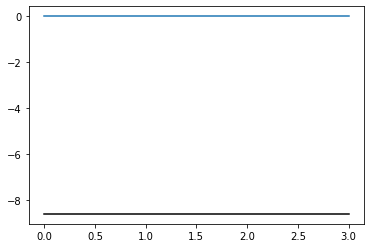

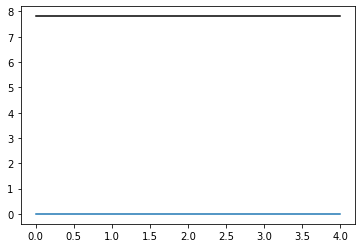

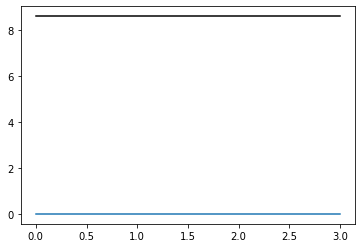

In [8]:
def PlaneFrameElementAxialDiagram(f, L):
    x1,x2,y1,y2=0,L,-f[0],f[3]
    plt.plot([x1,x2],[0,0])
    plt.plot([x1,x2],[y1,y2],'k')
    plt.show()

PlaneFrameElementAxialDiagram(f1,L1)
PlaneFrameElementAxialDiagram(f2,L2)
PlaneFrameElementAxialDiagram(f3,L3)


SFD for Element : 1


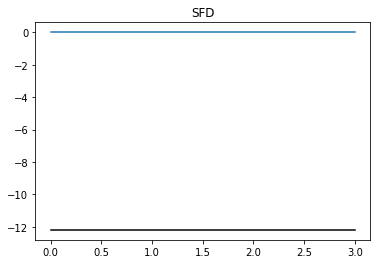

SFD for Element : 2


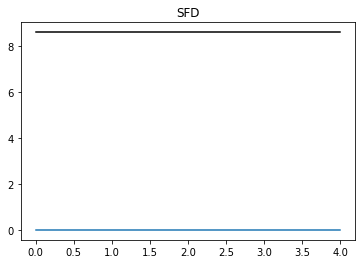

SFD for Element : 3


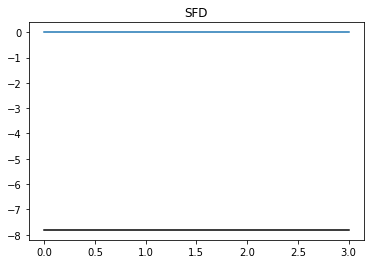

In [9]:
def PlaneFrameElementShearForceDiagram(f, L,m):
    x1,x2,y1,y2=0,L,f[1],-f[4]
    plt.plot([x1,x2],[0,0])
    plt.plot([x1,x2],[y1,y2],'k')
    plt.title("SFD")
    print(f"SFD for Element : {m}")
    plt.show()
PlaneFrameElementShearForceDiagram(f1, L1,1)
PlaneFrameElementShearForceDiagram(f2, L2,2)
PlaneFrameElementShearForceDiagram(f3, L3,3)



BMD for Element : 1


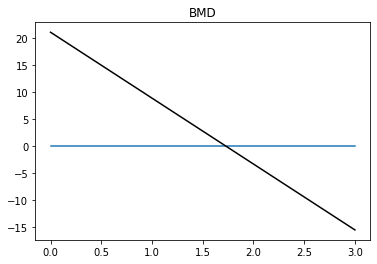

BMD for Element : 2


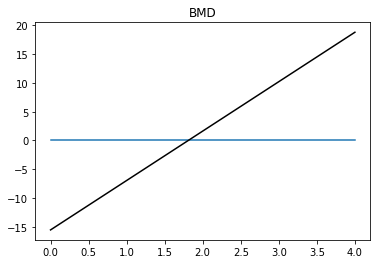

BMD for Element : 3


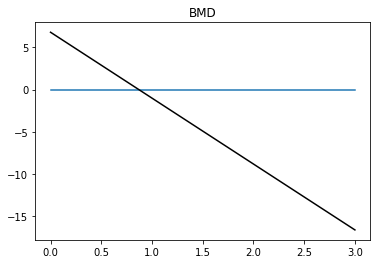

In [10]:
def PlaneFrameElementBendingMomentDiagram(f, L,m):
    x1,x2,y1,y2=0,L,-f[2],f[5]
    plt.plot([x1,x2],[0,0])
    plt.plot([x1,x2],[y1,y2],'k')
    plt.title("BMD")
    print(f"BMD for Element : {m}")
    plt.show()

PlaneFrameElementBendingMomentDiagram(f1, L1,1)
PlaneFrameElementBendingMomentDiagram(f2, L2,2)
PlaneFrameElementBendingMomentDiagram(f3, L3,3)